<a href="https://colab.research.google.com/github/VitalyGladyshev/med_work/blob/main/HD_HW_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from scipy.stats import shapiro
from scipy.stats import probplot
from scipy.stats import ttest_ind, mannwhitneyu
from scipy.stats import chi2_contingency

# Разведочный анализ - инфаркт (EDA)

## Подготовка данных

In [ ]:
data = pd.read_csv("Inf.csv")
data.head()

,id,Возр_грп,Пол,Возраст,Статус,Койко-дни,Оперативн,Откуда,Диагноз,Q,...,Ранее,Стент,ПНА,ПКА,ЛКА,ЗБВ,ЗНА,ВТК,ОА,ДА
0,1,3,0,69,пенсионер,2,до 6 часов,МСП,1,1,...,0,1,1,0,0,0,0,0,0,0
1,2,3,1,86,инвалид 3 гр.,4,более 48 часов,МСП,1,1,...,1,1,0,1,0,0,0,0,0,0
2,3,3,1,79,пенсионер,3,до 6 часов,Пол-ка,1,1,...,0,1,0,0,0,0,0,0,0,0
3,4,3,0,65,работающий,4,до 1 часа,МСП,1,1,...,0,1,0,0,0,0,0,0,0,0
4,5,3,0,70,пенсионер,3,до 48 часов,МСП,1,1,...,1,1,0,1,0,0,0,0,0,0


In [ ]:
data.describe()

,id,Возр_грп,Пол,Возраст,Койко-дни,Диагноз,Q,АГ,ХИБС,ПИКС,...,Ранее,Стент,ПНА,ПКА,ЛКА,ЗБВ,ЗНА,ВТК,ОА,ДА
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.0000,180.000000,180.000000,180.000000,...,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.0,180.000000,180.000000,180.000000
mean,90.500000,2.000000,0.238889,58.050000,2.594444,0.888889,0.6500,0.838889,0.255556,0.166667,...,0.138889,0.961111,0.388889,0.294444,0.011111,0.016667,0.0,0.116667,0.094444,0.033333
std,52.105662,0.818774,0.427594,12.845135,1.904705,0.315146,0.4783,0.368659,0.437390,0.373718,...,0.469921,0.610558,0.488858,0.457064,0.105114,0.128376,0.0,0.321918,0.293262,0.180006
min,1.000000,1.000000,0.000000,34.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,45.750000,1.000000,0.000000,49.000000,1.000000,1.000000,0.0000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,90.500000,2.000000,0.000000,55.500000,2.000000,1.000000,1.0000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,135.250000,3.000000,0.000000,67.000000,3.000000,1.000000,1.0000,1.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,180.000000,3.000000,1.000000,93.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,...,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 57 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           180 non-null    int64  
 1   Возр_грп     180 non-null    int64  
 2   Пол          180 non-null    int64  
 3   Возраст      180 non-null    int64  
 4   Статус       180 non-null    object 
 5   Койко-дни    180 non-null    int64  
 6   Оперативн    180 non-null    object 
 7   Откуда       178 non-null    object 
 8   Диагноз      180 non-null    int64  
 9   Q            180 non-null    int64  
 10  АГ           180 non-null    int64  
 11  ХИБС         180 non-null    int64  
 12  ПИКС         180 non-null    int64  
 13  СД           180 non-null    int64  
 14  ХБП          180 non-null    int64  
 15  Ожирение     180 non-null    int64  
 16  ХОБЛ         180 non-null    int64  
 17  Без_ХНЗ      180 non-null    int64  
 18  Боль_грудн   180 non-null    int64  
 19  Жжение  

In [ ]:
data.loc[data['Потливость'].isna(), 'Потливость'] = 0

In [ ]:
data.loc[data['Слабость'].isna(), 'Слабость'] = 0

In [ ]:
data.loc[data['Тошнота'].isna(), 'Тошнота'] = 0

In [ ]:
data.loc[data['К'].isna(), 'К'] = data['К'].mean()

In [ ]:
data.loc[data['Na'].isna(), 'Na'] = data['Na'].mean()

In [ ]:
data.loc[data['ФВ'].isna(), 'ФВ'] = data['ФВ'].mean()

In [ ]:
data['ЗНА'].mean()

0.0

In [ ]:
data = data.drop('ЗНА', axis=1)

Делаем копию для группировки

In [ ]:
data_red = data.copy()

### Кодируем текстовые категориальные данные

In [ ]:
data['Статус'].unique()

array(['пенсионер', 'инвалид 3 гр.', 'работающий', 'инвалид 2 гр.',
       'инвалид 1 гр.', 'неработающий'], dtype=object)

In [ ]:
map_status = dict()
i = 0

for el in data['Статус'].unique():
    map_status[el] = i
    i += 1

data_red['Статус'] = data['Статус'].map(map_status)

In [ ]:
data['Оперативн'].unique()

array(['до 6 часов', 'более 48 часов', 'до 1 часа', 'до 48 часов',
       'до 12 часов', 'до 24 часов', 'более 72 часов'], dtype=object)

In [ ]:
map_status = dict()
i = 0

for el in data['Оперативн'].unique():
    map_status[el] = i
    i += 1

data_red['Оперативн'] = data['Оперативн'].map(map_status)

In [ ]:
data['Откуда'].unique()

array(['МСП', 'Пол-ка', 'самообращение', 'др. стационар', 'ОТХ', '2 х/о',
       nan, 'поликлиника'], dtype=object)

In [ ]:
data.loc[data['Откуда'].isna(), 'Откуда'] = 'МСП'

In [ ]:
map_status = dict()
i = 0

for el in data['Откуда'].unique():
    map_status[el] = i
    i += 1

data_red['Откуда'] = data['Откуда'].map(map_status)

In [ ]:
data['Пол'].unique()

array([0, 1])

In [ ]:
map_sex = { 0: 'мужской', 1: 'женский'}
data['Пол'] = data['Пол'].map(map_sex)

In [ ]:
data.head()

,id,Возр_грп,Пол,Возраст,Статус,Койко-дни,Оперативн,Откуда,Диагноз,Q,...,СКГ,Ранее,Стент,ПНА,ПКА,ЛКА,ЗБВ,ВТК,ОА,ДА
0,1,3,мужской,69,пенсионер,2,до 6 часов,МСП,1,1,...,3,0,1,1,0,0,0,0,0,0
1,2,3,женский,86,инвалид 3 гр.,4,более 48 часов,МСП,1,1,...,1,1,1,0,1,0,0,0,0,0
2,3,3,женский,79,пенсионер,3,до 6 часов,Пол-ка,1,1,...,1,0,1,0,0,0,0,0,0,0
3,4,3,мужской,65,работающий,4,до 1 часа,МСП,1,1,...,1,0,1,0,0,0,0,0,0,0
4,5,3,мужской,70,пенсионер,3,до 48 часов,МСП,1,1,...,2,1,1,0,1,0,0,0,0,0


In [ ]:
data_red.head()

,id,Возр_грп,Пол,Возраст,Статус,Койко-дни,Оперативн,Откуда,Диагноз,Q,...,СКГ,Ранее,Стент,ПНА,ПКА,ЛКА,ЗБВ,ВТК,ОА,ДА
0,1,3,0,69,0,2,0,0,1,1,...,3,0,1,1,0,0,0,0,0,0
1,2,3,1,86,1,4,1,0,1,1,...,1,1,1,0,1,0,0,0,0,0
2,3,3,1,79,0,3,0,1,1,1,...,1,0,1,0,0,0,0,0,0,0
3,4,3,0,65,2,4,2,0,1,1,...,1,0,1,0,0,0,0,0,0,0
4,5,3,0,70,0,3,3,0,1,1,...,2,1,1,0,1,0,0,0,0,0


In [ ]:
data_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 56 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           180 non-null    int64  
 1   Возр_грп     180 non-null    int64  
 2   Пол          180 non-null    int64  
 3   Возраст      180 non-null    int64  
 4   Статус       180 non-null    int64  
 5   Койко-дни    180 non-null    int64  
 6   Оперативн    180 non-null    int64  
 7   Откуда       180 non-null    int64  
 8   Диагноз      180 non-null    int64  
 9   Q            180 non-null    int64  
 10  АГ           180 non-null    int64  
 11  ХИБС         180 non-null    int64  
 12  ПИКС         180 non-null    int64  
 13  СД           180 non-null    int64  
 14  ХБП          180 non-null    int64  
 15  Ожирение     180 non-null    int64  
 16  ХОБЛ         180 non-null    int64  
 17  Без_ХНЗ      180 non-null    int64  
 18  Боль_грудн   180 non-null    int64  
 19  Жжение  

In [ ]:
data_red.to_csv("inf_data_red.csv", sep=",", index=False)

In [ ]:
data_1 = data_red.loc[data_red['Возр_грп'] == 1]
data_1 = data_1.drop('Возр_грп', axis=1)
data_1.to_csv("inf_data_1.csv", sep=",", index=False)

In [ ]:
data_2 = data_red.loc[data_red['Возр_грп'] == 2]
data_2 = data_2.drop('Возр_грп', axis=1)
data_2.to_csv("inf_data_2.csv", sep=",", index=False)

In [ ]:
data_3 = data_red.loc[data_red['Возр_грп'] == 3]
data_3 = data_3.drop('Возр_грп', axis=1)
data_3.to_csv("inf_data_3.csv", sep=",", index=False)

## Корреляция

### Для всех 3 возрастных групп

<Axes: >

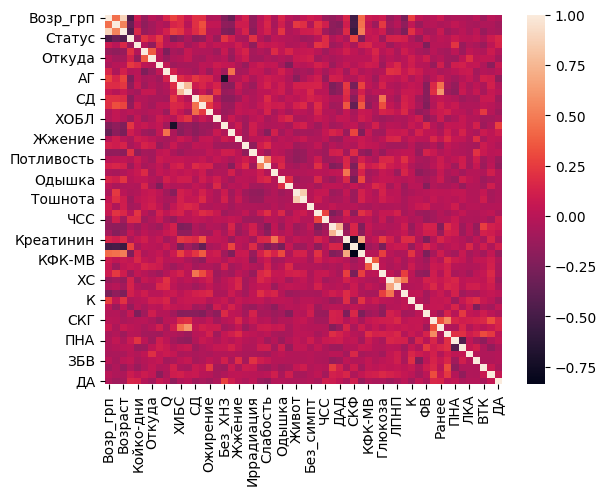

In [ ]:
sns.heatmap(data_red.drop('id', axis=1).corr('spearman'), annot=False)

<Axes: >

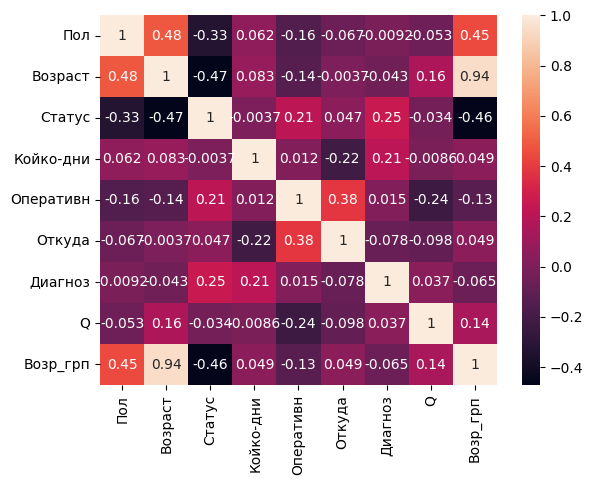

In [ ]:
sns.heatmap(data_red[[
'Пол',
'Возраст',
'Статус',
'Койко-дни',
'Оперативн',
'Откуда',
'Диагноз',
'Q',

'Возр_грп'
                    ]].corr('spearman'), annot=True)

<Axes: >

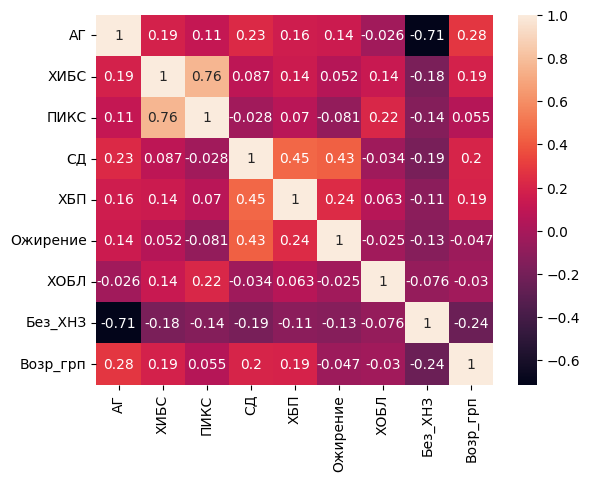

In [ ]:
sns.heatmap(data_red[[
'АГ',
'ХИБС',
'ПИКС',
'СД',
'ХБП',
'Ожирение',
'ХОБЛ',
'Без_ХНЗ',

'Возр_грп'
                    ]].corr('spearman'), annot=True)

### Группа 1

<Axes: >

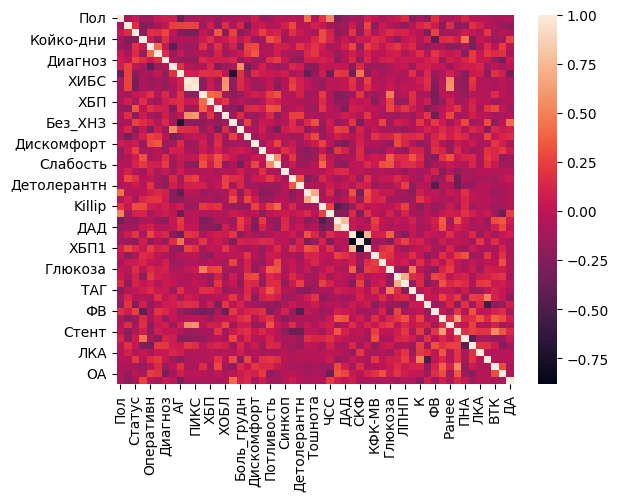

In [ ]:
sns.heatmap(data_1.drop(['id', 'Без_симпт'], axis=1).corr('spearman'), annot=False)

### Группа 2

<Axes: >

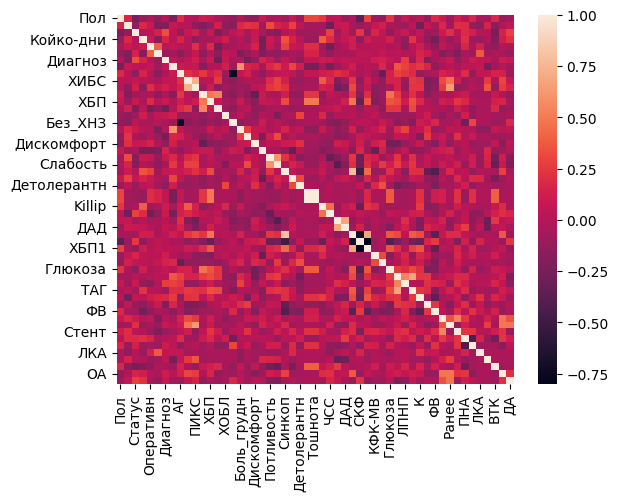

In [ ]:
sns.heatmap(data_2.drop(['id', 'Без_симпт'], axis=1).corr('spearman'), annot=False)

### Группа 3

<Axes: >

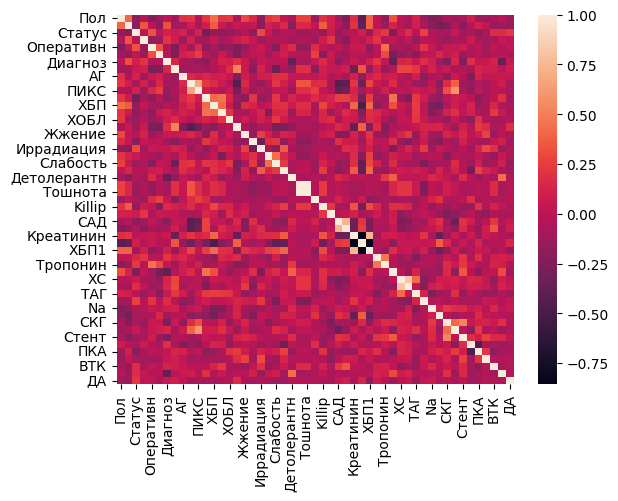

In [ ]:
sns.heatmap(data_3.drop(['id', 'Синкоп', 'Без_ХНЗ', 'ЛКА'], axis=1).corr('spearman'), annot=False)

### Сравнение по группам набора признаков с максимальной корреляцией

<Axes: >

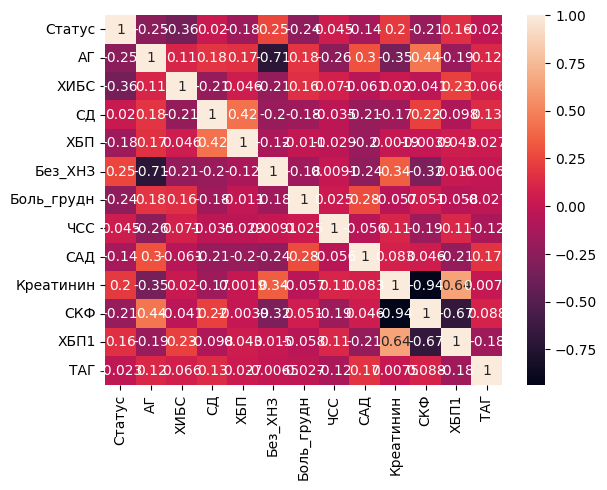

In [ ]:
sns.heatmap(data_1[[
'Статус',
'АГ',
'ХИБС',
'СД',
'ХБП',
'Без_ХНЗ',
'Боль_грудн',
'ЧСС',
'САД',
'Креатинин',
'СКФ',
'ХБП1',
'ТАГ'
                    ]].corr('spearman'), annot=True)

<Axes: >

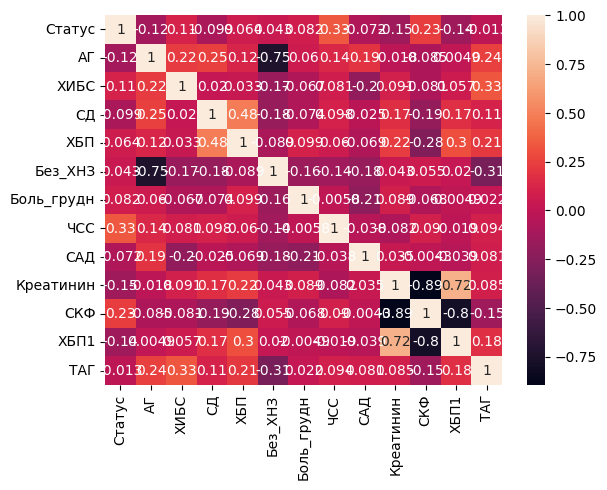

In [ ]:
sns.heatmap(data_2[[
'Статус',
'АГ',
'ХИБС',
'СД',
'ХБП',
'Без_ХНЗ',
'Боль_грудн',
'ЧСС',
'САД',
'Креатинин',
'СКФ',
'ХБП1',
'ТАГ'
                    ]].corr('spearman'), annot=True)

<Axes: >

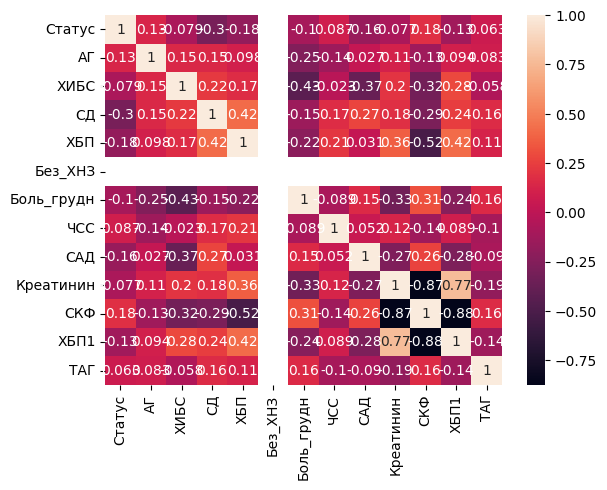

In [ ]:
sns.heatmap(data_3[[
'Статус',
'АГ',
'ХИБС',
'СД',
'ХБП',
'Боль_грудн',
'ЧСС',
'САД',
'Креатинин',
'СКФ',
'ХБП1',
'ТАГ'
                    ]].corr('spearman'), annot=True)